In [2]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Web scraping

In [24]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 10
page_size = 100

reviews_data = [] # List to store reviews data

for i in range(1, pages + 1):
    
    print(f"Scraping page {i}")
    
    # Create URL to collect links from paginated data
    url = f"{base_url}page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    # Collect HTML data from this page
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all review containers
    review_containers = soup.find_all("article", {"itemprop": "review"})
    
    for review in review_containers:
        # Extract review text
        review_text = review.find("div", {"class": "text_content"}).get_text(strip=True)
        
        # Extract reviewer name
        reviewer_name = review.find("span", {"itemprop": "name"}).get_text(strip=True) if review.find("span", {"itemprop": "name"}) else "N/A"
        
        # Extract review date
        review_date = review.find("time", {"itemprop": "datePublished"})["datetime"] if review.find("time", {"itemprop": "datePublished"}) else "N/A"
        
        # Extract review titles
        review_title = review.find("h2", {"class": "text_header"}).get_text(strip=True) if review.find("h2", {"class": "text_header"}) else "N/A"
        
        # Extract overall rating (out of 10)
        overall_rating = review.find("span", {"itemprop": "ratingValue"}).get_text(strip=True) if review.find("span", {"itemprop": "ratingValue"}) else "N/A"
        
        # Extract individual ratings
        ratings = {}
        rating_rows = review.find_all("tr")
        for row in rating_rows:
            columns = row.find_all("td")
            if len(columns) == 2:
                rating_category = columns[0].get_text(strip=True)
                filled_stars = len(columns[1].find_all("span", class_="star fill"))  # Count filled stars
                ratings[rating_category] = filled_stars if filled_stars > 0 else "N/A"
        
        # Store all extracted data in the dictionary created above
        review_data = {
            "Reviewer Name": reviewer_name,
            "Review Date": review_date,
            "Review Title": review_title,
            "Overall Rating": overall_rating,
            "Review Text": review_text,
            **ratings # Unpack ratings dictionary into the main dictionary
        }
        reviews_data.append(review_data) 
    
    print(f"   ---> {len(reviews_data)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [25]:
# Convert list of dictionaries to a DataFrame
df = pd.DataFrame(reviews_data)

# Display the first few rows
df.head()

,Reviewer Name,Review Date,Review Title,Overall Rating,Review Text,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,J Jones,2025-03-31,"""Very good service on this route""",10,Not Verified| Very good service on this route...,N/A,N/A,N/A,N/A,N/A,4.0,5.0,5.0,4.0,4,N/A,NaN,NaN
1,J Meares,2025-03-19,"""disagreeable flight attendant""",7,✅Trip Verified| Flight mainly let down by a ...,N/A,N/A,N/A,N/A,N/A,5.0,2.0,5.0,4.0,4,N/A,5.0,1.0
2,Luis De Jesus,2025-03-16,"""flight was delayed nearly 1 hour""",1,✅Trip Verified| Another awful experience by ...,NaN,N/A,N/A,N/A,N/A,1.0,1.0,NaN,1.0,1,N/A,NaN,NaN
3,Luis De Jesus,2025-03-16,"""full of attitude to me""",3,"✅Trip Verified| The service was rude, full o...",NaN,N/A,N/A,N/A,N/A,1.0,1.0,1.0,5.0,1,N/A,NaN,NaN
4,Luis De Jesus,2025-03-16,"""service was outrageous""",1,✅Trip Verified| This flight was a joke. Ther...,NaN,N/A,N/A,N/A,N/A,1.0,1.0,2.0,1.0,1,N/A,NaN,NaN


In [29]:
df.columns

Index(['Reviewer Name', 'Review Date', 'Review Title', 'Overall Rating',
       'Review Text', 'Aircraft', 'Type Of Traveller', 'Seat Type', 'Route',
       'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Value For Money', 'Recommended',
       'Inflight Entertainment', 'Wifi & Connectivity'],
      dtype='object')

In [30]:
df = df[["Reviewer Name", "Review Date", "Review Title", "Overall Rating", "Review Text", 
         "Seat Comfort", "Cabin Staff Service", "Food & Beverages", 
         "Value For Money", "Ground Service", "Wifi & Connectivity", 
         "Inflight Entertainment"]]
df

,Reviewer Name,Review Date,Review Title,Overall Rating,Review Text,Seat Comfort,Cabin Staff Service,Food & Beverages,Value For Money,Ground Service,Wifi & Connectivity,Inflight Entertainment
0,J Jones,2025-03-31,"""Very good service on this route""",10,Not Verified| Very good service on this route...,4.0,5.0,5.0,4,4.0,NaN,NaN
1,J Meares,2025-03-19,"""disagreeable flight attendant""",7,✅Trip Verified| Flight mainly let down by a ...,5.0,2.0,5.0,4,4.0,1.0,5.0
2,Luis De Jesus,2025-03-16,"""flight was delayed nearly 1 hour""",1,✅Trip Verified| Another awful experience by ...,1.0,1.0,NaN,1,1.0,NaN,NaN
3,Luis De Jesus,2025-03-16,"""full of attitude to me""",3,"✅Trip Verified| The service was rude, full o...",1.0,1.0,1.0,1,5.0,NaN,NaN
4,Luis De Jesus,2025-03-16,"""service was outrageous""",1,✅Trip Verified| This flight was a joke. Ther...,1.0,1.0,2.0,1,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,L Sawden,2019-09-10,"""a waste of money""",1,✅Trip Verified| Orlando to Gatwick. Terrible ...,1.0,1.0,1.0,1,1.0,NaN,NaN
996,K Pellberg,2019-09-10,"""welcome wasn’t especially friendly""",3,✅Trip Verified| Mahe to Stockholm via London. ...,1.0,2.0,2.0,2,1.0,NaN,4.0
997,John Allan,2019-09-08,"""been upgraded to Club World""",8,✅Trip Verified| Glasgow to Tampa via Gatwick....,4.0,5.0,3.0,4,5.0,NaN,3.0
998,S Bailey,2019-09-07,"""standards on BA have plummeted""",2,Not Verified| Orlando to Gatwick. Travelling ...,2.0,3.0,1.0,1,3.0,NaN,4.0


In [32]:
# Save to CSV file
df.to_csv("british_airways_reviews.csv", index=False)

## Data analysis

In [4]:
data = pd.read_csv("british_airways_reviews.csv")
data.head()

,Reviewer Name,Review Date,Review Title,Overall Rating,Review Text,Seat Comfort,Cabin Staff Service,Food & Beverages,Value For Money,Ground Service,Wifi & Connectivity,Inflight Entertainment
0,J Jones,2025-03-31,"""Very good service on this route""",10,Not Verified| Very good service on this route...,4.0,5.0,5.0,4,4.0,NaN,NaN
1,J Meares,2025-03-19,"""disagreeable flight attendant""",7,✅Trip Verified| Flight mainly let down by a ...,5.0,2.0,5.0,4,4.0,1.0,5.0
2,Luis De Jesus,2025-03-16,"""flight was delayed nearly 1 hour""",1,✅Trip Verified| Another awful experience by ...,1.0,1.0,NaN,1,1.0,NaN,NaN
3,Luis De Jesus,2025-03-16,"""full of attitude to me""",3,"✅Trip Verified| The service was rude, full o...",1.0,1.0,1.0,1,5.0,NaN,NaN
4,Luis De Jesus,2025-03-16,"""service was outrageous""",1,✅Trip Verified| This flight was a joke. Ther...,1.0,1.0,2.0,1,1.0,NaN,NaN


1) Review Text column

In [5]:
words_to_remove = ["Not", "Verified", "Trip", "✅"]
pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
data['Review Text'] = data['Review Text'].str.replace(pattern, '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

In [5]:
data.head()

,Reviewer Name,Review Date,Review Title,Overall Rating,Review Text,Seat Comfort,Cabin Staff Service,Food & Beverages,Value For Money,Ground Service,Wifi & Connectivity,Inflight Entertainment
0,J Jones,2025-03-31,"""Very good service on this route""",10,| Very good service on this route BA2710 30th ...,4.0,5.0,5.0,4,4.0,NaN,NaN
1,J Meares,2025-03-19,"""disagreeable flight attendant""",7,✅ | Flight mainly let down by a disagreeable f...,5.0,2.0,5.0,4,4.0,1.0,5.0
2,Luis De Jesus,2025-03-16,"""flight was delayed nearly 1 hour""",1,✅ | Another awful experience by British Airway...,1.0,1.0,NaN,1,1.0,NaN,NaN
3,Luis De Jesus,2025-03-16,"""full of attitude to me""",3,"✅ | The service was rude, full of attitude to ...",1.0,1.0,1.0,1,5.0,NaN,NaN
4,Luis De Jesus,2025-03-16,"""service was outrageous""",1,✅ | This flight was a joke. There was four peo...,1.0,1.0,2.0,1,1.0,NaN,NaN


In [38]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


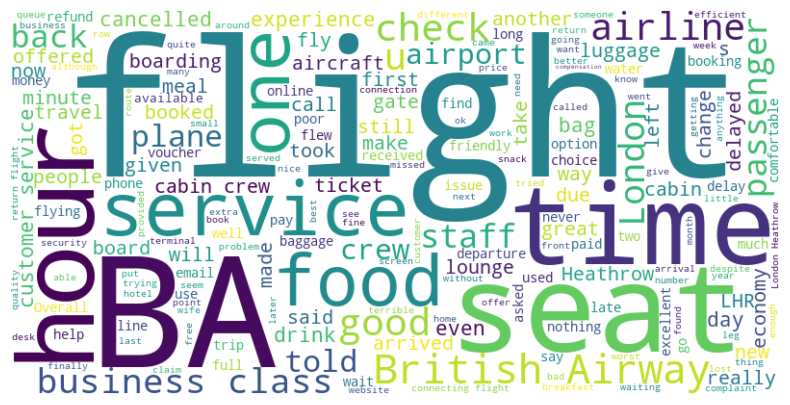

In [ ]:
# Wordcloud visualization
from wordcloud import WordCloud

# Combine all text from the Review Text column
text = ' '.join(data['Review Text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#Display the workd cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [7]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 9.9 MB/s eta 0:00:00


In [8]:
# Sentiment Analysis
from textblob import TextBlob

# Function to calculate sentiment polarity and subjectivity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply the function to the Review Text column
data['Polarity'], data['Subjectivity'] = zip(*data['Review Text'].apply(get_sentiment))
data

,Reviewer Name,Review Date,Review Title,Overall Rating,Review Text,Seat Comfort,Cabin Staff Service,Food & Beverages,Value For Money,Ground Service,Wifi & Connectivity,Inflight Entertainment,Polarity,Subjectivity
0,J Jones,2025-03-31,"""Very good service on this route""",10,| Very good service on this route BA2710 30th ...,4.0,5.0,5.0,4,4.0,NaN,NaN,-0.120648,0.547778
1,J Meares,2025-03-19,"""disagreeable flight attendant""",7,✅ | Flight mainly let down by a disagreeable f...,5.0,2.0,5.0,4,4.0,1.0,5.0,0.207461,0.539853
2,Luis De Jesus,2025-03-16,"""flight was delayed nearly 1 hour""",1,✅ | Another awful experience by British Airway...,1.0,1.0,NaN,1,1.0,NaN,NaN,-0.320000,0.413333
3,Luis De Jesus,2025-03-16,"""full of attitude to me""",3,"✅ | The service was rude, full of attitude to ...",1.0,1.0,1.0,1,5.0,NaN,NaN,-0.045833,0.520833
4,Luis De Jesus,2025-03-16,"""service was outrageous""",1,✅ | This flight was a joke. There was four peo...,1.0,1.0,2.0,1,1.0,NaN,NaN,-0.450000,0.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,L Sawden,2019-09-10,"""a waste of money""",1,✅ | Orlando to Gatwick. Terrible flight experi...,1.0,1.0,1.0,1,1.0,NaN,NaN,-0.316667,0.450000
996,K Pellberg,2019-09-10,"""welcome wasn’t especially friendly""",3,✅ | Mahe to Stockholm via London. Checked in o...,1.0,2.0,2.0,2,1.0,NaN,4.0,0.035714,0.536565
997,John Allan,2019-09-08,"""been upgraded to Club World""",8,✅ | Glasgow to Tampa via Gatwick. Early mornin...,4.0,5.0,3.0,4,5.0,NaN,3.0,0.272614,0.482778
998,S Bailey,2019-09-07,"""standards on BA have plummeted""",2,| Orlando to Gatwick. Travelling home was extr...,2.0,3.0,1.0,1,3.0,NaN,4.0,-0.191528,0.523472


In [9]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
data['Sentiment'] = data['Polarity'].apply(categorize_sentiment)
data

,Reviewer Name,Review Date,Review Title,Overall Rating,Review Text,Seat Comfort,Cabin Staff Service,Food & Beverages,Value For Money,Ground Service,Wifi & Connectivity,Inflight Entertainment,Polarity,Subjectivity,Sentiment
0,J Jones,2025-03-31,"""Very good service on this route""",10,| Very good service on this route BA2710 30th ...,4.0,5.0,5.0,4,4.0,NaN,NaN,-0.120648,0.547778,Negative
1,J Meares,2025-03-19,"""disagreeable flight attendant""",7,✅ | Flight mainly let down by a disagreeable f...,5.0,2.0,5.0,4,4.0,1.0,5.0,0.207461,0.539853,Positive
2,Luis De Jesus,2025-03-16,"""flight was delayed nearly 1 hour""",1,✅ | Another awful experience by British Airway...,1.0,1.0,NaN,1,1.0,NaN,NaN,-0.320000,0.413333,Negative
3,Luis De Jesus,2025-03-16,"""full of attitude to me""",3,"✅ | The service was rude, full of attitude to ...",1.0,1.0,1.0,1,5.0,NaN,NaN,-0.045833,0.520833,Negative
4,Luis De Jesus,2025-03-16,"""service was outrageous""",1,✅ | This flight was a joke. There was four peo...,1.0,1.0,2.0,1,1.0,NaN,NaN,-0.450000,0.650000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,L Sawden,2019-09-10,"""a waste of money""",1,✅ | Orlando to Gatwick. Terrible flight experi...,1.0,1.0,1.0,1,1.0,NaN,NaN,-0.316667,0.450000,Negative
996,K Pellberg,2019-09-10,"""welcome wasn’t especially friendly""",3,✅ | Mahe to Stockholm via London. Checked in o...,1.0,2.0,2.0,2,1.0,NaN,4.0,0.035714,0.536565,Positive
997,John Allan,2019-09-08,"""been upgraded to Club World""",8,✅ | Glasgow to Tampa via Gatwick. Early mornin...,4.0,5.0,3.0,4,5.0,NaN,3.0,0.272614,0.482778,Positive
998,S Bailey,2019-09-07,"""standards on BA have plummeted""",2,| Orlando to Gatwick. Travelling home was extr...,2.0,3.0,1.0,1,3.0,NaN,4.0,-0.191528,0.523472,Negative


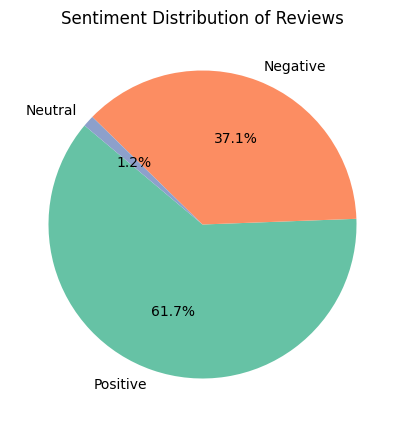

In [10]:
sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Sentiment Distribution of Reviews')
plt.show()

2. Individual ratings 

(a) Seat Comfort

In [14]:
seat_counts = data['Seat Comfort'].value_counts()
seat_counts

Seat Comfort
1.0    256
3.0    218
4.0    165
2.0    153
5.0    121
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_11052\3858806602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seat_counts.index, y=seat_counts.values, palette='viridis')


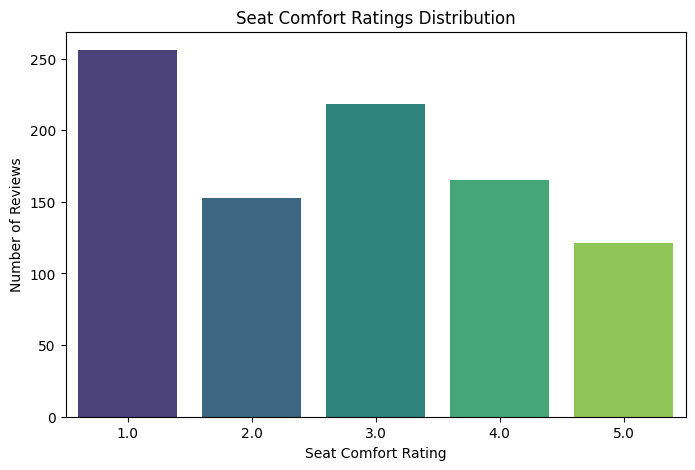

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x=seat_counts.index, y=seat_counts.values, palette='viridis')
plt.xlabel('Seat Comfort Rating')
plt.ylabel('Number of Reviews')
plt.title('Seat Comfort Ratings Distribution')
plt.show()

(b) Cabin Staff Service

In [12]:
cabin_counts = data['Cabin Staff Service'].value_counts()
cabin_counts

Cabin Staff Service
5.0    243
1.0    217
3.0    167
4.0    161
2.0    115
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_11052\3561854448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cabin_counts.index, y=cabin_counts.values, palette='viridis')


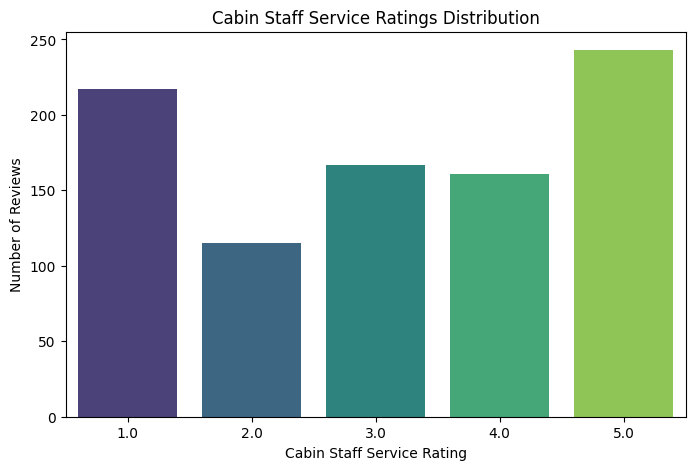

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cabin_counts.index, y=cabin_counts.values, palette='viridis')
plt.xlabel('Cabin Staff Service Rating')
plt.ylabel('Number of Reviews')
plt.title('Cabin Staff Service Ratings Distribution')
plt.show()

(c) Food & Beverages

In [16]:
food_counts = data['Food & Beverages'].value_counts()
food_counts

Food & Beverages
1.0    265
3.0    149
2.0    123
4.0    122
5.0    121
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_11052\3518866891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=food_counts.index, y=food_counts.values, palette='viridis')


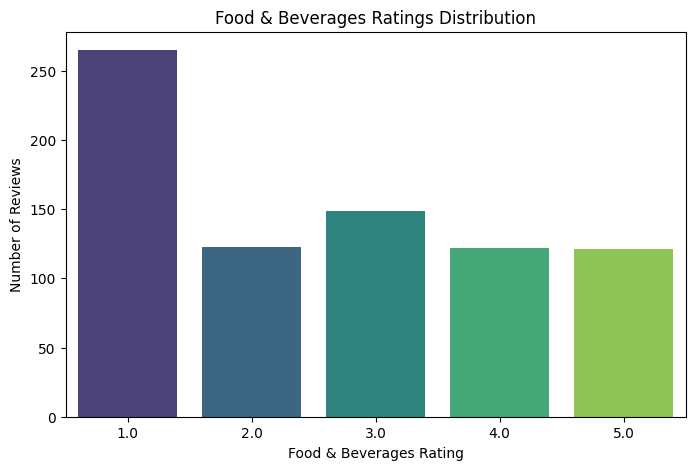

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x=food_counts.index, y=food_counts.values, palette='viridis')
plt.xlabel('Food & Beverages Rating')
plt.ylabel('Number of Reviews')
plt.title('Food & Beverages Ratings Distribution')
plt.show()

(d) Value for money

In [18]:
value_counts = data['Value For Money'].value_counts()
value_counts

Value For Money
1    460
4    144
3    140
2    140
5    116
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_11052\1610166145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


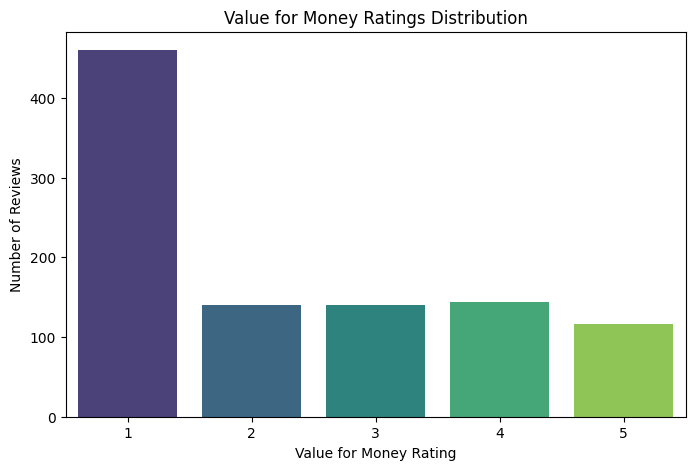

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xlabel('Value for Money Rating')
plt.ylabel('Number of Reviews')
plt.title('Value for Money Ratings Distribution')
plt.show()

(e) Ground services

In [20]:
ground_counts = data['Ground Service'].value_counts()
ground_counts

Ground Service
1.0    413
4.0    161
3.0    139
5.0    138
2.0     93
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_11052\2431167504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ground_counts.index, y=ground_counts.values, palette='viridis')


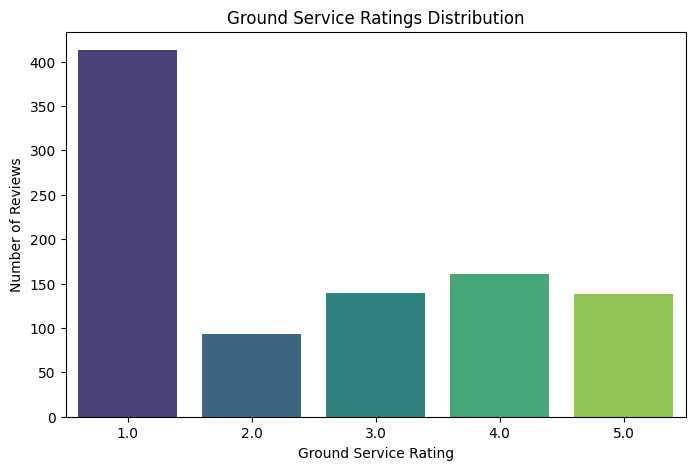

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(x=ground_counts.index, y=ground_counts.values, palette='viridis')
plt.xlabel('Ground Service Rating')
plt.ylabel('Number of Reviews')
plt.title('Ground Service Ratings Distribution')
plt.show()

3. Overall rating

In [22]:
overall_counts = data['Overall Rating'].value_counts()
overall_counts

Overall Rating
1     388
2     105
3      94
8      79
9      77
10     76
4      60
5      46
7      42
6      33
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_11052\151706217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_counts.index, y=overall_counts.values, palette='viridis')


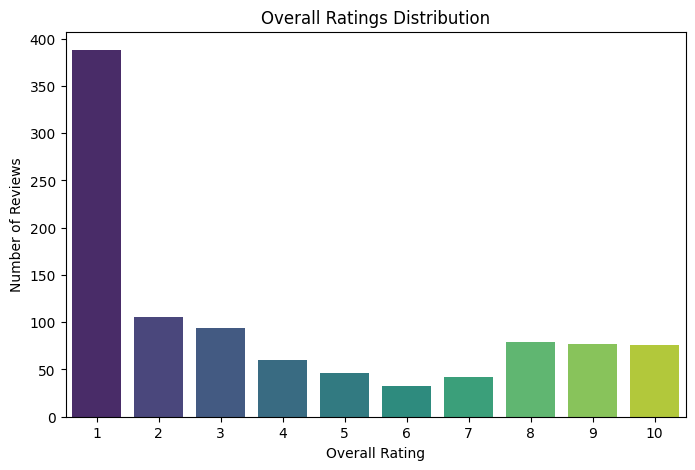

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x=overall_counts.index, y=overall_counts.values, palette='viridis')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.title('Overall Ratings Distribution')
plt.show()